In [2]:
import pandas as pd
from sqlalchemy import create_engine
import os
import json
import matplotlib.pyplot as plt


def load_credentials(path = "aws_rds_credentials.json"):
     with open(path, 'r') as file:
          config = json.load(file)

     # set up credentials
     for key in config.keys():
          os.environ[key] = config[key]

     return

time_interval = 90 #days

load_credentials()

aws_rds_url = f"postgresql://{os.environ['user']}:{os.environ['password']}@{os.environ['host']}:{os.environ['port']}/{os.environ['database']}?sslmode=require"

engine = create_engine(aws_rds_url)
sql_query = f"""SELECT brand_title, price_numeric, catalog_id, status
               FROM public.tracking_staging 
               WHERE date >= CURRENT_DATE - INTERVAL '{time_interval} days'
               """
data = pd.read_sql(sql_query, engine)
data

,brand_title,price_numeric,catalog_id,status
0,Diesel,15.0,1845.0,Bom
1,Calvin Klein,15.0,1845.0,Muito bom
2,Stradivarius,5.0,1079.0,Muito bom
3,Stradivarius,7.0,1043.0,Novo sem etiquetas
4,Pull & Bear,5.0,190.0,Novo sem etiquetas
...,...,...,...,...
407448,CUIR,14.0,1238.0,Satisfatório
407449,Meltin Pot,14.0,1844.0,Bom
407450,Diesel,18.0,1845.0,Muito bom
407451,Menglu,3.0,1066.0,Bom


In [12]:
top_volume = data.groupby(["catalog_id"])["price_numeric"].sum()
top_volume = top_volume.sort_values(ascending= False).head(10)
top_volume.plot(kind='bar', x='catalog_id', y='volume', figsize=(10, 6))
plt.xlabel('Brand Title')
plt.ylabel('Count')
plt.title('Top 10 Catalogs by Volume')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

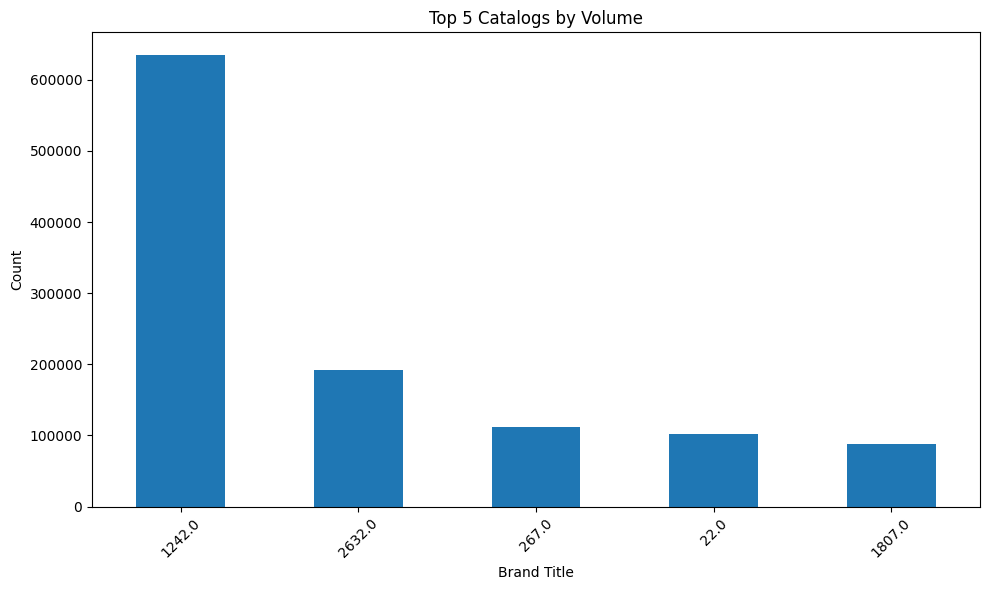